## Aplicacion Regresion

Para ello vamos a usar el dataset web_traffic.tsv (tab separate values).
La data nos muestra la cantidad de hits a una web por cada hora

In [17]:
import scipy as sp
# Especificaremos a los tabs como delimitadores para
# separar cada columna
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")
print(data[:10])
print(data.shape)
# Tenemos 743 puntos de data con 2 dimensiones

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


#### Preprocesamiento y Limpieza de data

In [18]:
# El vector X va a contener las horas.
# El vector y va a contener la cantidad de hits en una
# hora en particular.

X = data[:, 0] 
y = data[:, 1]


In [19]:
# Tenemos 8 np.nan

sp.sum(sp.isnan(y))

8

In [20]:
# Vamos a remover los puntos donde y es np.nan

X = X[~sp.isnan(y)]
y = y[~sp.isnan(y)]

Para tener una primera impresion de nuestro datos, vamos a plotearlo.

Para ellos vamos a usar Matplotlib.Matplotlib que contiene el paquete pyplot, el cual intenta imitar la interfaz de MATLAB.

Es conveniente y facil de usar.

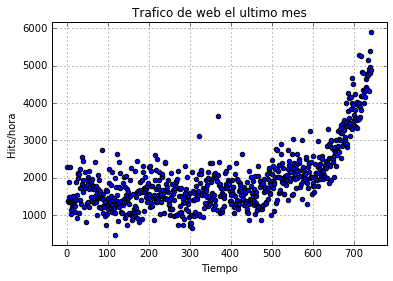

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.title("Trafico de web el ultimo mes")
plt.xlabel("Tiempo")
plt.ylabel("Hits/hora")
#plt.xticks([w*7*24 for w in range(10)],
#           ['week %i' %w for w in range(10)])
plt.autoscale(tight = True)
plt.grid()
plt.show()

¿Cuánto tiempo manejará nuestro servidor el tráfico web entrante?
- Encontrar el modelo real detras de los puntos de la data
- Usar el modelo para extrapolar 

Antes de contruir el modelo, primero debemos fijarnos en el error.

In [22]:
def error(f, x, y):
    return sp.sum((f(x) - y)**2) 

# Se nota la belleza del vectorizado
# f(x) debe retornar un vector y, debe ser del mismo size
# y tipo que 'y'

In [28]:
# La funcion sp.polyfit() nos crea la funcion del modelo 
# desde los parametros del modelo (X, y).

# residuals = error

fp1, residuals, rank, sv, rcond = sp.polyfit(X, y, 1, full = True)
print("Model parameters: %s" %fp1)
print(residuals)

Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]


Esto nos indica que el mejor ajuste de recta es:
    
    f(x) = 2.59619213 * x + 989.02487106

### Referencias:
- http://www.scipy.org/Tentative_NumPy_Tutorial
- http://matplotlib.org/users/pyplot_tutorial.html